# **Part I: Exploratory data analysis (EDA)**


## **1. Importing the libraries and the data**

In [ ]:
pip install pandas

In [ ]:
pip install openpyxl

In [2]:
# Importing the libraries
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Excel file
rfm = pd.read_excel('ecommerce retail.xlsx', sheet_name='ecommerce retail')

# Displaying the first few rows of the dataframe
rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## **2. Explanatory Data Analysis (EDA)**

### **2.1. Check null values and data type**

In [3]:
# Checking the information of the dataset
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# Checking missing values in each column
missing_values = rfm.isnull().sum()

# Displaying the count of missing values for each column
print(missing_values) ## CustomerID has 135080 null values => drop them

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
# Dropping rows where CustomerID is null
rfm_cleaned = rfm.dropna(subset=['CustomerID'])

# Checking missing values in each column again
rfm_cleaned.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### **2.2. Get summary statistics**

In [6]:
# Get summary statistics
rfm_stats = rfm_cleaned[['Quantity', 'UnitPrice', 'CustomerID']].describe()
rfm_stats 

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


### **2.3. Correcting data type and filtering data**

#### **2.3.1 Correcting data type**

In [ ]:
# Converting 'CustomerID' to 'int64'
rfm_cleaned['CustomerID'] = rfm_cleaned['CustomerID'].astype('int64')

In [8]:
# Displaying the data types to confirm changes
rfm_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


#### **2.3.2 Removing duplicates**

In [9]:
# View the exact duplicate rows
exact_duplicates = rfm_cleaned[rfm_cleaned.duplicated(keep='first')]
exact_duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446,United Kingdom


In [10]:
# Remove exact duplicates while keeping the first occurrence
rfm_cleaned = rfm_cleaned.drop_duplicates(keep='first')

# Double check to see if there is any duplicate row left
exact_duplicates2 = rfm_cleaned[rfm_cleaned.duplicated(keep='first')]
exact_duplicates2 

print("Number of exact duplicate entries:", rfm_cleaned.duplicated(keep=False).sum()) # no duplicates left

Number of exact duplicate entries: 0


#### **2.3.3 Filtering data**

In [11]:
# Filtering the dataframe where Quantity > 0 
rfm_filtered = rfm_cleaned[(rfm_cleaned['Quantity'] > 0) & (rfm_cleaned['UnitPrice'] > 0) ]

# Displaying the first few rows to confirm the filtering
rfm_filtered.head()
rfm_filtered[['Quantity', 'UnitPrice', 'CustomerID']].describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


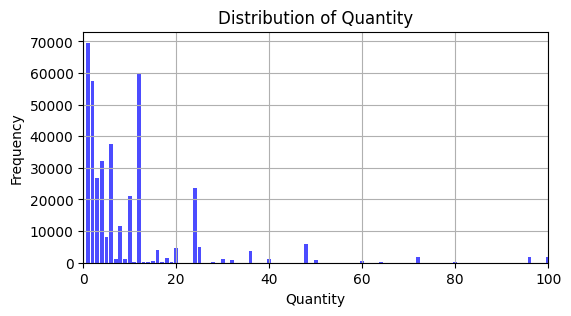

In [12]:
# Plotting the distribution of 'Quantity'

# Calculating the frequency of each unique Quantity value
quantity_counts = rfm_filtered['Quantity'].value_counts().sort_index()

# Plotting the bar chart for Quantity
plt.figure(figsize=(6, 3))
plt.bar(quantity_counts.index, quantity_counts.values, color='blue', alpha=0.7)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Narrowing the x-axis range for better visibility; adjust as needed
plt.grid(True)
plt.show()


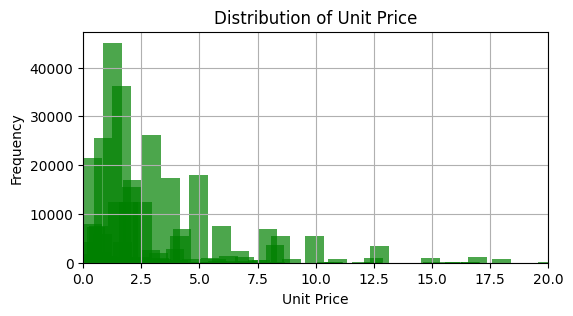

In [13]:
# Plotting the distribution of 'UnitPrice'

# Calculating the frequency of each unique UnitPrice value
unit_price_counts = rfm_filtered['UnitPrice'].value_counts().sort_index()

# Plotting the bar chart for UnitPrice
plt.figure(figsize=(6, 3))
plt.bar(unit_price_counts.index, unit_price_counts.values, color='green', alpha=0.7)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.xlim(0, 20)  # Narrowing the x-axis range for better visibility; adjust as needed
plt.grid(True)
plt.show()

-------------------------------------------------------------

# **Part II: Calculating RFM (Recency – Frequency – Monetary) Score**

To create an RFM (Recency, Frequency, Monetary) model, we'll calculate three key metrics for each customer:

- **Recency**: How recently a customer made a purchase.
    Calculate the number of days between the present date (assuming that the present date were **31 December 2011**) and the date of the last purchase for each customer.
    
- **Frequency**: How often a customer makes a purchase.
    Calculate the number of orders for each customer.
    
- **Monetary**: How much money a customer spends on purchases.
    Calculate the sum of purchase prices for each customer.

## **1. Calculating Recency – Frequency – Monetary**

In [16]:
from datetime import datetime

# Define the present date for recency calculation
current_date = datetime(2011, 12, 31)  # Assuming the present date is December 31, 2011

# Define the column 'TotalPrice'
rfm_filtered.loc[:, 'TotalPrice'] = rfm_filtered['Quantity'] * rfm_filtered['UnitPrice']

# Calculate RFM in one step
rfm_merged = rfm_filtered.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': lambda x: x.sum()  # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

rfm_merged

,Recency,Frequency,Monetary
CustomerID,,,
12346,346,1,77183.60
12347,23,7,4310.00
12348,96,4,1797.24
12349,39,1,1757.55
12350,331,1,334.40
...,...,...,...
18280,298,1,180.60
18281,201,1,80.82
18282,28,2,178.05


## **2. Calculating Recency – Frequency – Monetary scores**

In [17]:
# Rank Recency in ascending order 
rfm_merged['Recency_Rank'] = rfm_merged['Recency'].rank(method='first', ascending=True)

# Rank Frequency in descending order 
rfm_merged['Frequency_Rank'] = rfm_merged['Frequency'].rank(method='first', ascending=True)

# Rank Monetary in descending order 
rfm_merged['Monetary_Rank'] = rfm_merged['Monetary'].rank(method='first', ascending=True)

# Apply qcut on the ranked columns to create R, F, M scores with correct order
rfm_merged['R_score'] = pd.qcut(rfm_merged['Recency_Rank'], 5, labels=[5, 4, 3, 2, 1])    # lower is better
rfm_merged['F_score'] = pd.qcut(rfm_merged['Frequency_Rank'], 5, labels=[1, 2, 3, 4, 5])  # higher is better
rfm_merged['M_score'] = pd.qcut(rfm_merged['Monetary_Rank'], 5, labels=[1, 2, 3, 4, 5])   # higher is better

# Combine R, F, and M scores into a single RFM Score
rfm_merged['RFM_Score'] = rfm_merged['R_score'].astype(str) + rfm_merged['F_score'].astype(str) + rfm_merged['M_score'].astype(str)

# Display the updated DataFrame
rfm_merged.reset_index(inplace=True)
rfm_merged = rfm_merged[['CustomerID', 'Frequency', 'Monetary', 'Recency', 'R_score', 'F_score', 'M_score', 'RFM_Score']]
rfm_merged


,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_Score
0,12346,1,77183.60,346,1,1,5,115
1,12347,7,4310.00,23,5,5,5,555
2,12348,4,1797.24,96,2,4,4,244
3,12349,1,1757.55,39,4,1,4,414
4,12350,1,334.40,331,1,1,2,112
...,...,...,...,...,...,...,...,...
4333,18280,1,180.60,298,1,2,1,121
4334,18281,1,80.82,201,1,2,1,121
4335,18282,2,178.05,28,5,3,1,531
4336,18283,16,2045.53,24,5,5,4,554


## **3. Joining the RFM dataframe with Segment**

In [18]:
# Load the 'Segmentation' sheet from the Excel file
seg = pd.read_excel('ecommerce retail.xlsx', sheet_name='Segmentation')

# Display the first few rows of the dataframe
seg

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214, 215, 115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [19]:
# Convert the comma-separated string in 'RFM_Score' column to a list of RFM scores
seg['RFM Score'] = seg['RFM Score'].str.split(', ')

# Use explode() to transform each element of a list-like to a row
seg = seg.explode('RFM Score').reset_index(drop=True)
seg


,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
119,Lost customers,112
120,Lost customers,121
121,Lost customers,131
122,Lost customers,141


In [20]:
# Merge the 'seg' DataFrame with 'rfm_merged' on the 'RFM Score' column
rfm_final = rfm_merged.merge(seg, left_on='RFM_Score', right_on='RFM Score', how='left')

# Display the updated DataFrame with segments
rfm_final = rfm_final[['CustomerID', 'Frequency', 'Monetary', 'Recency', 'R_score', 'F_score', 'M_score', 'RFM_Score', 'Segment']]
rfm_final ## Our final output is here

,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_Score,Segment
0,12346,1,77183.60,346,1,1,5,115,Cannot Lose Them
1,12347,7,4310.00,23,5,5,5,555,Champions
2,12348,4,1797.24,96,2,4,4,244,At Risk
3,12349,1,1757.55,39,4,1,4,414,Promising
4,12350,1,334.40,331,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
4333,18280,1,180.60,298,1,2,1,121,Lost customers
4334,18281,1,80.82,201,1,2,1,121,Lost customers
4335,18282,2,178.05,28,5,3,1,531,Potential Loyalist
4336,18283,16,2045.53,24,5,5,4,554,Champions


In [21]:
# Export the DataFrame to a CSV file
rfm_final.to_csv('rfm_segments.csv', index=False)

In [22]:
# Export DataFrame to Excel
rfm_final.to_excel('rfm_segments.xlsx', index=False)

# **Part III: Visualizations & Insights**

## **1. Histogram (distribution of 'Recency', 'Frequency', & 'Monetary')**

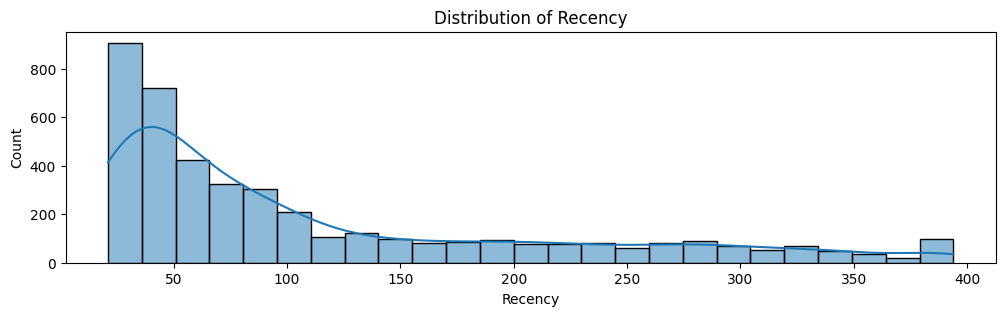

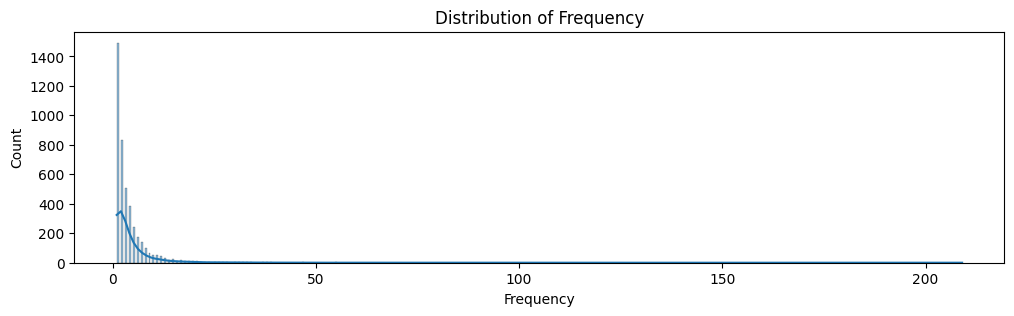

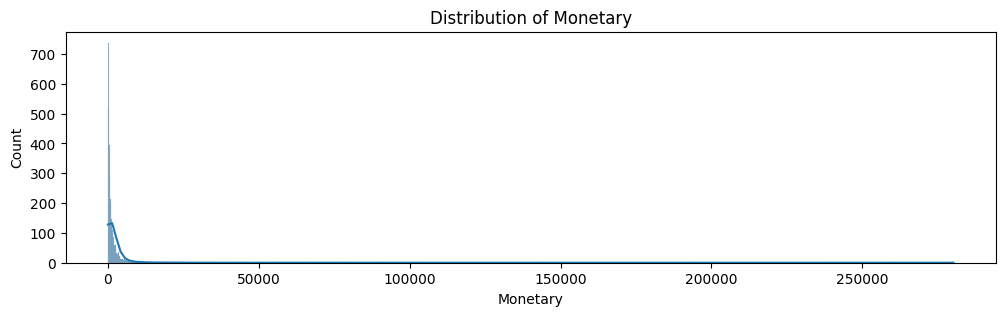

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
colnames = ['Recency', 'Frequency', 'Monetary']

# Plotting the distributions of Recency, Frequency, and Monetary
for col in colnames:
    fig, ax = plt.subplots(figsize=(12, 3))
    sns.histplot(rfm_final[col], kde=True, ax=ax)  # Use sns.histplot instead of sns.distplot
    ax.set_title(f'Distribution of {col}')
    plt.show()

## **2. Treemap**
### - Segment by customers
### - Segment by total sales

In [ ]:
pip install squarify

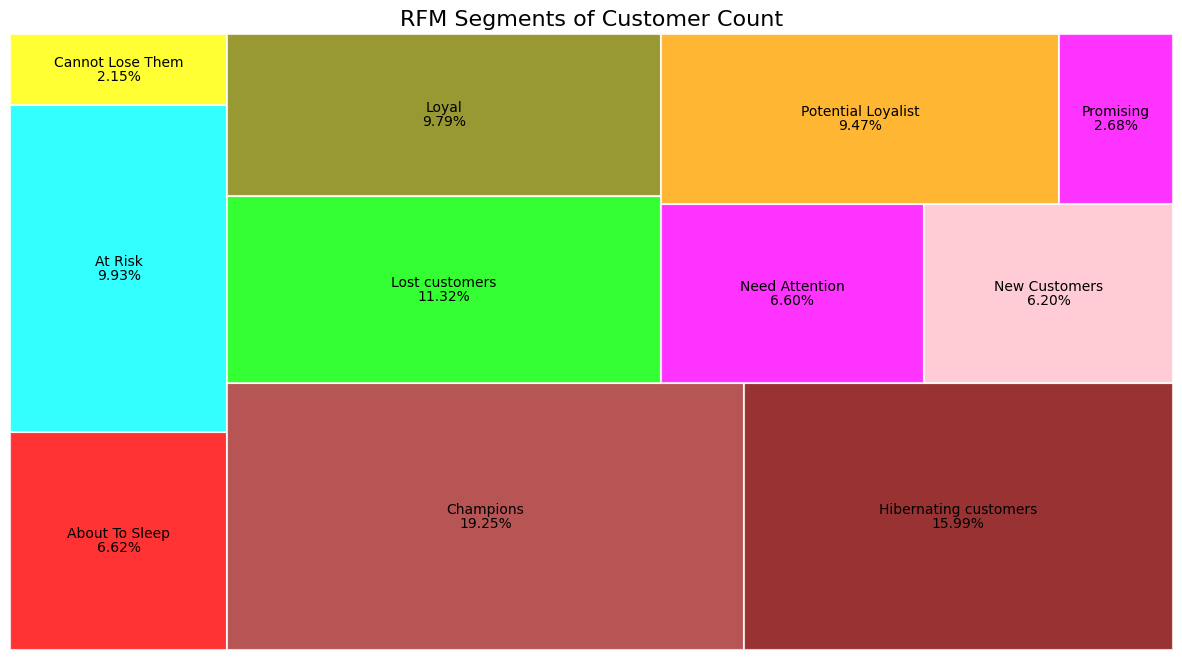

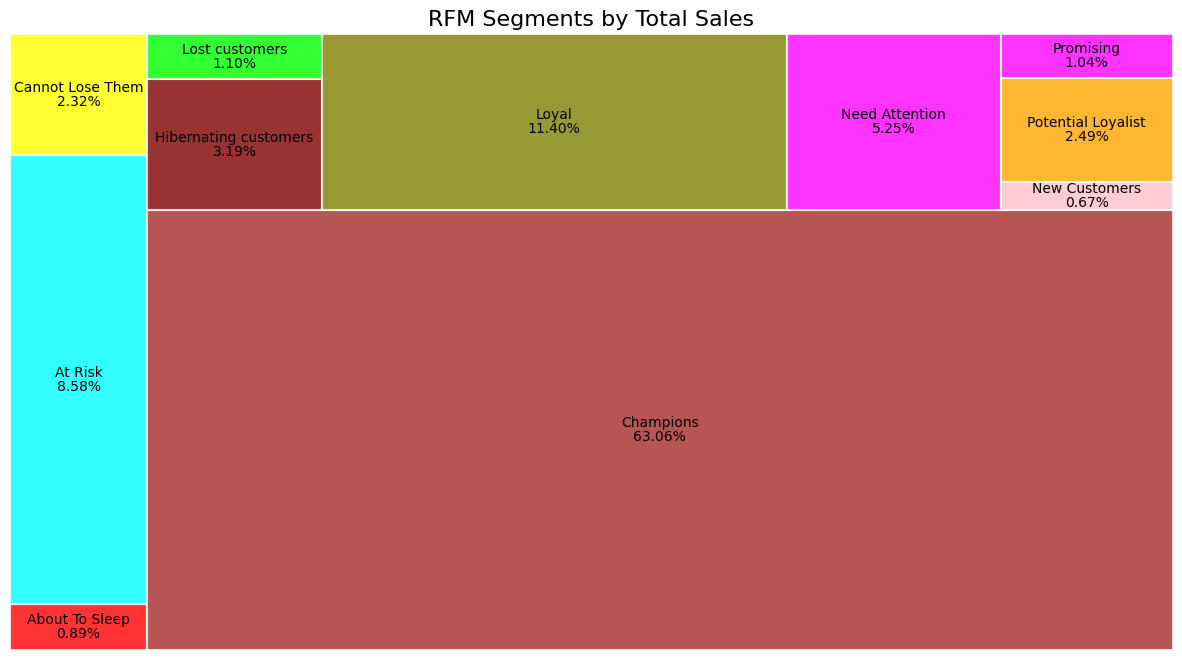

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Assuming 'rfm_final' is the DataFrame containing the RFM analysis results

# Group by Segment and calculate the number of customers and total sales
grp = rfm_final.groupby('Segment').agg(
    Cust_count=('CustomerID', 'count'),
    Total_sales=('Monetary', 'sum')
).reset_index()

# Define colors for the treemap
colors = ['#FF0000', '#00FFFF', '#FFFF00', '#A52A2A', '#800000', 
          '#00FF00', '#808000', '#FF00FF', '#FFC0CB', '#FFA500', 
          '#FF00FF', '#736F6E']

# Treemap by Customer Count
fig, ax = plt.subplots(1, figsize=(15, 8))
squarify.plot(
    sizes=grp['Cust_count'],
    label=grp['Segment'],
    value=[f'{x*100/grp["Cust_count"].sum():.2f}%' for x in grp['Cust_count']],
    alpha=0.8,
    color=colors,
    bar_kwargs=dict(linewidth=1.5, edgecolor="white")
)
plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show()

# Treemap by Total Sales
fig, ax = plt.subplots(1, figsize=(15, 8))
squarify.plot(
    sizes=grp['Total_sales'],
    label=grp['Segment'],
    value=[f'{x*100/grp["Total_sales"].sum():.2f}%' for x in grp['Total_sales']],
    alpha=0.8,
    color=colors,
    bar_kwargs=dict(linewidth=1.5, edgecolor="white")
)
plt.title('RFM Segments by Total Sales', fontsize=16)
plt.axis('off')
plt.show()


In [26]:
# Group by 'Segment' and calculate the mean of Recency, Frequency, and Monetary
segment_summary = rfm_final.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()
segment_summary = segment_summary.round(2)
segment_summary

,Segment,Recency,Frequency,Monetary
0,About To Sleep,106.58,1.29,275.77
1,At Risk,163.01,3.75,1772.45
2,Cannot Lose Them,257.11,2.34,2211.58
3,Champions,31.79,12.14,6716.04
4,Hibernating customers,170.15,1.56,408.67
5,Lost customers,295.32,1.07,199.00
6,Loyal,56.62,5.34,2387.01
7,Need Attention,53.69,3.11,1633.09
8,New Customers,48.83,1.07,222.67
9,Potential Loyalist,47.16,2.51,540.14


In [27]:
# Customer count and Total Sales by Segment
grp

,Segment,Cust_count,Total_sales
0,About To Sleep,286,78871.590
1,At Risk,429,760380.191
2,Cannot Lose Them,93,205676.500
3,Champions,832,5587745.710
4,Hibernating customers,691,282393.002
5,Lost customers,489,97313.360
6,Loyal,423,1009705.980
7,Need Attention,285,465431.631
8,New Customers,268,59674.930
9,Potential Loyalist,409,220916.480


## **3. Insights & Recommendations**

Based on above analyses, actionable insights for the Marketing teams are as follows.

#### **3.1. Segment analysis:**

| Segment               | Customer_count | Total_sales | Recency | Frequency | Monetary |
|-----------------------|----------------|-------------|---------|-----------|----------|
| Champions             | 832            | 5587745.71  | 31.79   | 12.14     | 6716.04  |
| Loyal                 | 423            | 1009705.98  | 56.62   | 5.34      | 2387.01  |
| Cannot Lose Them      | 93             | 205676.50   | 257.11  | 2.34      | 2211.58  |
| At Risk               | 429            | 760380.19   | 163.01  | 3.75      | 1772.45  |
| Hibernating customers | 691            | 282393.00   | 170.15  | 1.56      | 408.67   |
| Lost customers        | 489            | 97313.36    | 295.32  | 1.07      | 199.00   |
| Promising             | 116            | 92503.23    | 45.90   | 1.28      | 797.44   |
| Potential Loyalist    | 409            | 220916.48   | 47.16   | 2.51      | 540.14   |
| Need Attention        | 285            | 465431.63   | 53.69   | 3.11      | 1633.09  |
| About To Sleep        | 286            | 78871.59    | 106.58  | 1.29      | 275.77   |
| New Customers         | 268            | 59674.93    | 48.83   | 1.07      | 222.67   |



#### **3.2. Insights and recommendations:**

| Segment               | Insights                                                                                                  |
|-----------------------|-----------------------------------------------------------------------------------------------------------|
| Champions             | Keep engaged with rewards and exclusive offers.                                                           |
| Loyal                 | Strengthen ties with loyalty programs and special recognition.                                            |
| Cannot Lose Them      | Re-engage with personalized offers to prevent churn.                                                      |
| At Risk               | Use win-back campaigns and discounts to re-engage.                                                        |
| Hibernating Customers | Reactivate with targeted marketing and incentives.                                                        |
| Lost Customers        | Minimal-cost re-engagement like newsletters or passive marketing.                                         |
| Promising             | Nurture with personalized offers and upselling.                                                           |
| Potential Loyalist    | Encourage purchases with loyalty incentives and promotions.                                               |
| Need Attention        | Re-engage with targeted messages and tailored offers.                                                     |
| About To Sleep        | Reactivate with offers, reminders, or relevant content.                                                   |
| New Customers         | Onboard with welcome messages and introductory offers to drive repeat purchases.                          |




### **Which customer segment has the highest proportion? What does this indicate about the business's performance? What are the characteristics of these customer segments?**

**Customer Segment with the Highest Proportion:**

The **"Champions"** segment has the highest number of customers (832), making up the largest portion of the customer base. This indicates that the business has a strong group of highly engaged, high-value customers.

**Implications for the Business's performance:**

- **Strong Customer Engagement:** A large "Champions" segment suggests successful engagement with top customers, leading to frequent and high-value purchases.
- **High Customer Loyalty:** This indicates effective retention strategies, as these customers remain active and committed to the brand.
- **Sustainable Revenue Stream:** The presence of many "Champions" provides a stable and reliable source of revenue from this loyal and valuable segment.

**Characteristics of the "Champions" Segment:**

- **High Frequency and Value:** They buy often and spend significantly, making them the most valuable group.
- **Low Recency:** They are actively engaged and consistently interact with the business.
- **Brand Advocates:** Their loyalty often translates to positive word-of-mouth and recommendations.

**Business Implications:**

- **Upselling and Cross-Selling Opportunities:** Leverage their loyalty by introducing new products or services tailored to their preferences.
- **Continued Engagement:** Maintain high satisfaction to prevent them from slipping into lower-value segments like "At Risk" or "Cannot Lose Them."

### **Which customer segments should the business focus on? Why? What actions should the business take?**


**Customer Segments to focus on:**

1. **Champions and Loyal:**
   - **Reason:** These are the most valuable and engaged customers.
   - **Actions:** Continue offering personalized rewards, exclusive deals, and maintain high engagement to keep them loyal and satisfied.

2. **Cannot Lose Them:**
   - **Reason:** These customers are valuable but at risk of disengaging.
   - **Actions:** Re-engage with personalized offers and targeted communications to win them back.

3. **At Risk:**
   - **Reason:** Recently disengaged but still hold value.
   - **Actions:** Implement reactivation strategies like special discounts or reminders to prevent churn.

4. **Potential Loyalist:**
   - **Reason:** These customers show promise and can become more engaged.
   - **Actions:** Encourage frequent purchases with loyalty programs and tailored recommendations.

**Strategic actions:**

- **Prioritize Retention:** Focus on retaining high-value customers by refining segmentation, personalizing communication, and gathering feedback.
- **Targeted Engagement:** Use specific offers and reactivation strategies to nurture key segments, maximizing their value and reducing the risk of churn.

This approach will enhance customer relationships, improve retention, and support sustainable business growth.